## Load libraries

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
import os,sys
import re
import math
from datetime import datetime
import time
sys.dont_write_bytecode = True

In [ ]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
from typing import List, Set, Dict, Tuple, Optional, Iterable, Mapping, Union, Callable, TypeVar

from pprint import pprint
from ipdb import set_trace as brpt

In [ ]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from  torch.linalg import norm as tnorm
from torch.utils.data import Dataset, DataLoader, random_split

from torchvision import datasets, transforms

import pytorch_lightning as pl
from pytorch_lightning.core.lightning import LightningModule
from pytorch_lightning import loggers as pl_loggers
from pytorch_lightning.tuner.tuning import Tuner


# Select Visible GPU
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="1"

## Set Path 
1. Add project root and src folders to `sys.path`
2. Set DATA_ROOT to `maptile_v2` folder

In [ ]:
this_nb_path = Path(os.getcwd())
ROOT = this_nb_path.parent
SRC = ROOT/'src'
DATA_ROOT = Path("/data/hayley-old/maptiles_v2/")
paths2add = [this_nb_path, ROOT]

print("Project root: ", str(ROOT))
print('Src folder: ', str(SRC))
print("This nb path: ", str(this_nb_path))


for p in paths2add:
    if str(p) not in sys.path:
        sys.path.insert(0, str(p))
        print(f"\n{str(p)} added to the path.")
        
print(sys.path)

## Probability Transformations


Let $X$ be a random variable whose pdf is a normal distribution with $\mu$ and $\sigma^2$. 
$Y$ is a transformed random variable s.t. $Y = g(X)$ where $g(x) = - \ln(x)$. What is the pdf of $Y$?
<!--
$f_{X}(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \text{exp}( -\frac{1}{2} (\frac{x-\mu}{\sigma})^2)$

$$
\begin{equation} \label{eqn:fy}
\begin{split}
    f_{Y}(y) &= f_{X}(g^{-1}(y)) \Vert \dv{g^{-1}(y)}{y} \Vert \\
             &= \frac{e^{-y}}{\sqrt{2\pi\sigma^2}} \exp{ -\frac{1}{2} (\frac{e^{-y} -\mu}{\sigma})^2}
\end{split}
\end{equation}
$$
-->


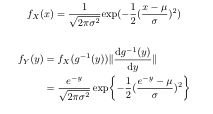


In [ ]:
class PDFx:
    
    def __init__(self,mu:float, std:float):
        self.mu = mu
        self.std = std
        
    def __call__(self,x: Union[np.ndarray, list, float, int]):
        x = np.array(x)
        denom = np.sqrt(2*np.pi*self.std**2)
        quad = -.5*((x-self.mu)/self.std)**2
        return np.exp(quad)/denom
    
    def compute_fy(self,y: Union[np.ndarray, list, float, int]):
        return np.exp(-y) * self( np.exp(-y))
    
    

In [ ]:
mu, std = 0,1
fx = PDFx(mu, std)

xmin, xmax = -10,10
n_samples = 300
x = np.linspace(xmin,xmax,n_samples)
px = fx(x)
py = fx.compute_fy(x)
plt.plot(x, px, label='$f_{X}$')
plt.plot(x, py, label='$f_{Y}$')
